In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 16
rcParams['axes.titlesize'] = 20
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [3]:
import seaborn as sns
sns.set_style("whitegrid")

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h1 class="panel-title">Задание 1: Разминка</h1> 
    </div>
</div>

Нельзя приступать к сложным упражнениям, не размявшись. Поэтому сначала все будет очень просто.

1. __Прочитай данные.__ В этой задаче предлагается находить общую сумму платежа страховой компании (`TotalPayment`) по количеству поданых исков (`NumberOfClaims`).

2. __Построй диаграмму рассеяния__ (scatter plot) и убедись по графику, что со стоящей перед тобой задачей справится даже хорошо выдрессированный пёс.

3. __Расчехляй `LinearRegression`__ и нарусуй на той же диаграмме рассеяния ее предсказания в виде красной линии.

4. __Измерь ошибку__ предсказаний с помощью метрики __RMSE__ - _"корень из среднеквадратической ошибки"_. Все метрики лежат в `sklearn.metrics`. Если ты все сделал правильно, она будет равна примерно 35. 

In [4]:
df = pd.read_csv('data/LinearRegressionHW/AutoInsuranceSweden.csv')
df.sort_values(by=['NumberOfClaims'], inplace=True)

In [5]:
df.head()

,NumberOfClaims,TotalPayment
30,0,0.0
15,2,6.6
49,3,39.9
23,3,13.2
18,3,4.4


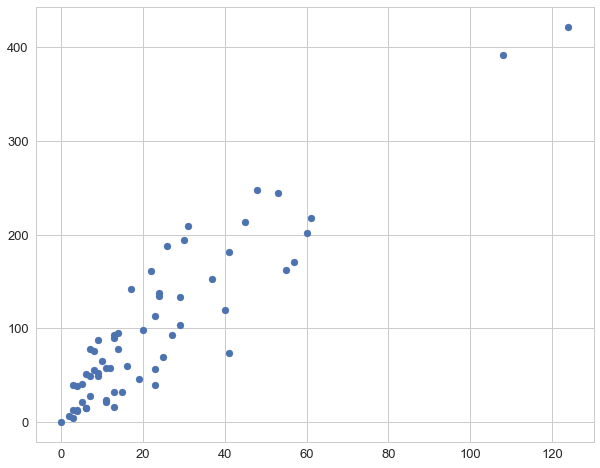

In [6]:
plt.scatter(df.NumberOfClaims, df.TotalPayment);

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
rmse = lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))

In [9]:
X, y = df[['NumberOfClaims']], df.TotalPayment

In [10]:
clf = LinearRegression()
clf.fit(X, y);

y_hat = clf.predict(X)

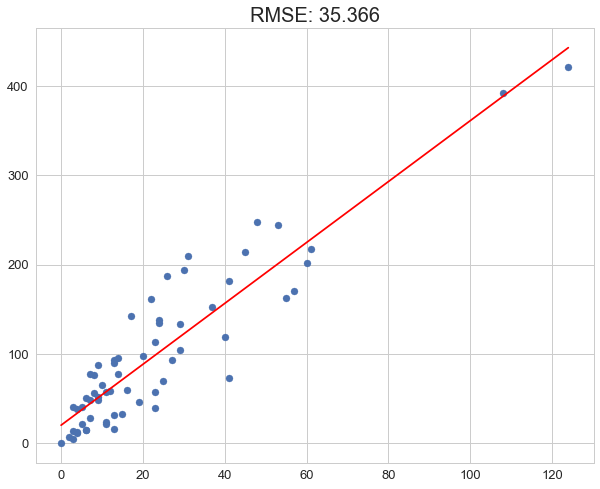

In [12]:
plt.scatter(df.NumberOfClaims, df.TotalPayment);
plt.plot(X, y_hat, c='r');
plt.title('RMSE: %.3f' % rmse(y, y_hat));

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h1 class="panel-title">Задание 2: Странная китайская еда</h1> 
    </div>
</div>

Добро пожаловать на кухню! И сегодня в шоу Джейми Оливера мы будем готовить морские ушки! 

...в смысле вы не знаете, что это? А ну бегом читать [википедию](https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D1%80%D1%81%D0%BA%D0%B8%D0%B5_%D1%83%D1%88%D0%BA%D0%B8)!

<table>
    <tr>
        <td width="53%"><img src="https://upload.wikimedia.org/wikipedia/commons/c/c1/Pinkabalone_300.jpg"></td>
        <td width="47%"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/LivingAbalone.JPG/1920px-LivingAbalone.JPG"></td>
    </tr>
</table>

Так вот.

Конечно, для того, чтобы приготовить лучший в мире [чонбукчук](https://ru.wikipedia.org/wiki/%D0%A7%D0%BE%D0%BD%D0%B1%D0%BE%D0%BA%D1%87%D1%83%D0%BA), нужны только самые молодые ушки, у которых самое нежное мясо. Вообще, как я понял, возраст определяется по кольцам на раковине, но для нормального подсчета ее надо вскрыть, а не хотелось бы.

Нужно пользоваться косвенными признаками и угадать возраст с помощью машинного обучения!

In [13]:
df = pd.read_csv('data/LinearRegressionHW/AbaloneAge.csv')

In [14]:
df.shape

(4177, 9)

In [15]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Итак.

* `Sex` - пол. Их три! Есть мужские особи (`M`), женские (`F`) и ..остальные (`I`);
* `Length` - длина раковины;
* `Diameter` - диаметр раковины;
* `Height` - толщина раковины;
* `WholeWeight` - весь вес;
* `ShuckedWeight` - вес без раковины;
* `VisceraWeight` - вес внутренностей;
* `ShellWeight` - вес только раковины;
* `Rings` - наша __целевая переменная__.

Ага. И теперь разумный вопрос: как мы измерили вес частей моллюска, не вскрывая его?... Ой, все!

<div class="panel panel-info">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2.1: Визуализация</h3> 
    </div>
</div>

Это опциональный блок, в котором ты можешь построить те графики, которые сам посчитаешь нужным построить. Исследуй данные, найди, может, что-то интересное в них, что поможет в дальнейшем сформировать новые признаки.

In [16]:
df.Sex = pd.factorize(df.Sex)[0]

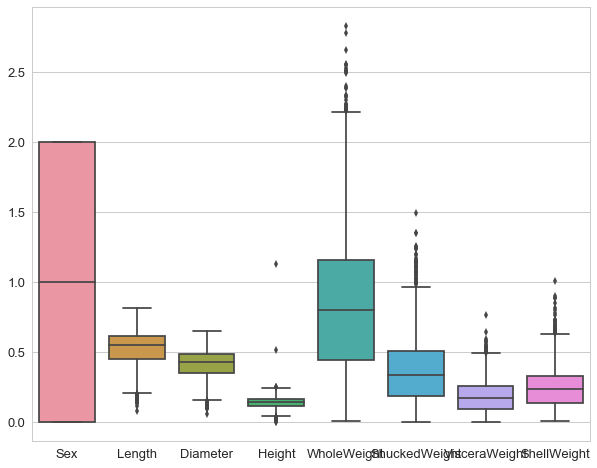

In [17]:
sns.boxplot(df.drop('Rings', axis=1));

<div class="panel panel-info">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2.2: Новые признаки</h3> 
    </div>
</div>

1. Для начала импортируй __`train_test_split`__ из пакета `sklearn.model_selection`.
2. С помощью него разбей выборку, и измерь качество твоего алгоритма той же метрикой __RMSE__.
3. Добавь в данные новый признак: __объем моллюска__, равный произведению признаков `Length`, `Diameter` и `Height`.
4. Повтори пункт 2, сравни результат. Стало ли лучше? 

Не забудь, кстати, во второй раз (п.4) разбить выборку абсолютно точно так же, как и в первый (п.2). Для этого зафиксируй параметр `random_state`.

In [19]:
X, y = df.drop('Rings', axis=1), df.Rings

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
clf = LinearRegression()
clf.fit(X_train, y_train);
rmse(y_test, clf.predict(X_test))

2.2441968111220492

In [23]:
df['Volume'] = df.Length * df.Diameter * df.Height

In [24]:
X, y = df.drop('Rings', axis=1), df.Rings

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
clf = LinearRegression()
clf.fit(X_train, y_train);
np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))

2.2162557825419933

<div class="panel panel-info">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2.4: Поиск лучшего</h3> 
    </div>
</div>

Настало время найти лучший регрессор!

* `PolynomialFeatures` лежит в `sklearn.preprocessing`
* `Pipeline` лежит в `sklearn.pipeline`
* `GridSearchCV`, `StratifiedKFold`, `cross_val_score` лежат в `sklearn.model_selection`

Ты знаешь, что делать.

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

In [28]:
clf = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('clf', LinearRegression())
])

In [29]:
params = {
    'poly__degree': [1,2,3,4],
    'poly__interaction_only': [True, False],
    'poly__include_bias': [True, False]
}

In [30]:
gs = GridSearchCV(clf, params, scoring='neg_mean_squared_error', 
                  cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=69),
                  return_train_score=False)
gs.fit(X, y);

In [31]:
gs.best_params_

{'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False}

In [32]:
np.sqrt(-gs.best_score_)

2.1740948463262426

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h1 class="panel-title">Задание 3: Бостонская застройка</h1> 
    </div>
</div>

Давайте теперь взглянем с вами на классический датасет "Boston house prices":

In [65]:
from sklearn.datasets import load_boston

bunch = load_boston()

target = 'MEDV'

df = pd.DataFrame(data=bunch.data, columns=bunch.feature_names)
df[target] = bunch.target

In [66]:
print(bunch.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

<div class="panel panel-info">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3.1: Easy-breezy</h3> 
    </div>
</div>

Не забудь заскейлить исходные данные и зафить-ка теперь `SGDRegressor` на 1000 итерациях (параметр `n_iter`). Поэкспериментируй с `alpha`, то есть скоростью обучения.

Че, вышло че? RMSE на кросс-валидации (давай на 10 фолдах) в студию!

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
ss = StandardScaler()
X = ss.fit_transform(df.drop('MEDV', axis=1).values)

y = df['MEDV']

In [69]:
from sklearn.linear_model import SGDRegressor

In [70]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
NMSE = 'neg_mean_squared_error'

In [71]:
ss = cross_val_score(LinearRegression(), X, y, scoring=NMSE, cv=skf)
-np.mean(ss), np.std(ss)

(24.578995875902535, 7.05133959180902)

In [72]:
ss = cross_val_score(SGDRegressor(n_iter=1000), X, y, scoring=NMSE, cv=skf)
-np.mean(ss), np.std(ss)

(24.599945160496542, 7.0400511785907334)

In [73]:
gs = GridSearchCV(SGDRegressor(n_iter=1000, random_state=0), { 'alpha': [10**(x-4) for x in range(6)] }, 
                  scoring=NMSE, cv=skf)
gs.fit(X, y);

In [74]:
gs.best_score_

-24.124296436801565

In [75]:
gs.best_params_

{'alpha': 0.01}

<div class="panel panel-info">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3.2: Расследование</h3> 
    </div>
</div>

Давайте-ка построим очень важный тип графиков: график предсказанных остатков. 

1. Возьмите LinearReression, выучитесь на всех данных, и предскажите их.
2. Постройте диаграмму рассеяния, где по оси `x` откладывайте __значения целевой переменной__, а по `y` - __разницу между оригинальными и предсказанными значениями целевой переменной__.

Что вы видите? Вот вам различные случаи вида полученного графика:

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/07/residual.png">

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/07/heterosk.png">

* Очевидно, если по `y` мы рисуем отклонение от верного значения, то если точки кучкуются около __`y=0`__, то все прям классно-классно!
* Случай, когда ничего особенного не происходит, изображен на верхнем-левом графике. Это в целом та же ситуация, что и с точками около __`y=0`__, только мы ошибаемся чуть больше. Обратите внимание, что нет ни каких-то __особенных форм__ облака точек, просто облачко.
* Если есть __паттерн__ (график справа вверху), как тут - парабола, то, значит, именно такая, квадратичная зависимость, не была захвачена моделью, и проявилась в остатках. Это - хороший знак того, что время добавлять признаки вроде __`log(X)`__,  __`√X`__ или __`X²`__. 
* Если проявляется __форма воронки__, как на третьем графике внизу, где масса точек становится толще с возрастанием значений оси `x`, то все не очень хорошо: диагностируется __гетероскедастичность__ остатков, то есть неравномерность отклонений (дисперсии).

Не забывай, в конце-концов, можно обаращать просто свое внимание на странно расположенные точки. Построй такую диаграмму и посмотри. 

Нашелся ли кто странный? :)

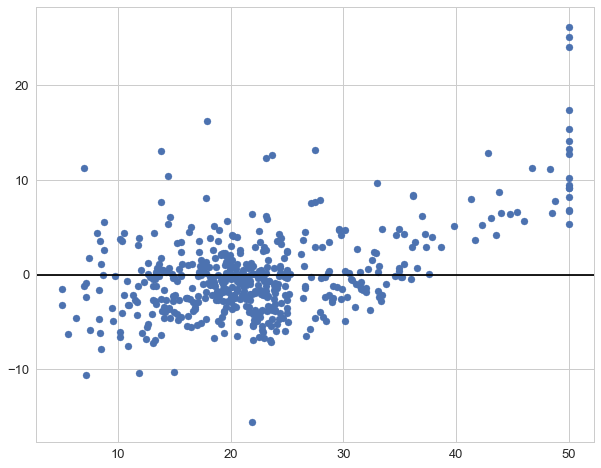

In [76]:
clf = LinearRegression()
clf.fit(X, y)
y_hat = clf.predict(X)

plt.scatter(y, (y - y_hat));
plt.axhline(y=0, c='k');

<div class="panel panel-info">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3.3: Stranger things</h3> 
    </div>
</div>

Если ты ничего не нашел любопытного на графике выше, то просто пропускай это задание: data science не для тебя.

Если же ты все еще здесь...

1. Построй гистограмму таргета. То же странное явление из 3.2 видно?
2. Как думаешь, почему такое возникло? 
3. Что бы ты сделал для устранения такой аномалии? Для этого порассуждай, как такие вещи могли оказаться в данных.

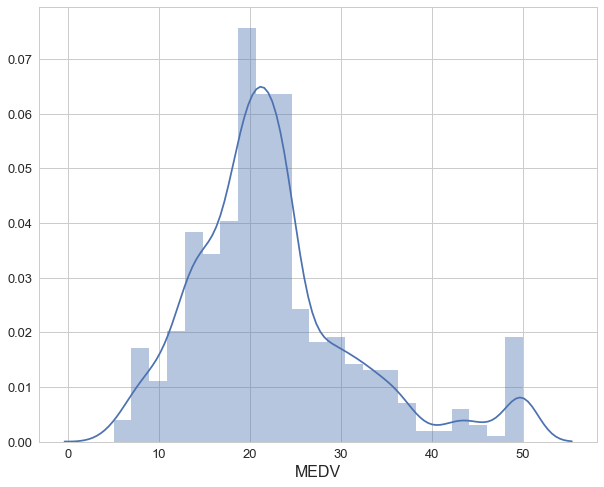

In [77]:
sns.distplot(df.MEDV);

In [78]:
df.loc[df.MEDV == 50, 'MEDV'] = np.nan

rnds = np.random.choice(df.MEDV[df.MEDV.notnull()], size=df.MEDV.isnull().sum(), replace=True)

df.loc[df.MEDV.isnull(), 'MEDV'] = rnds

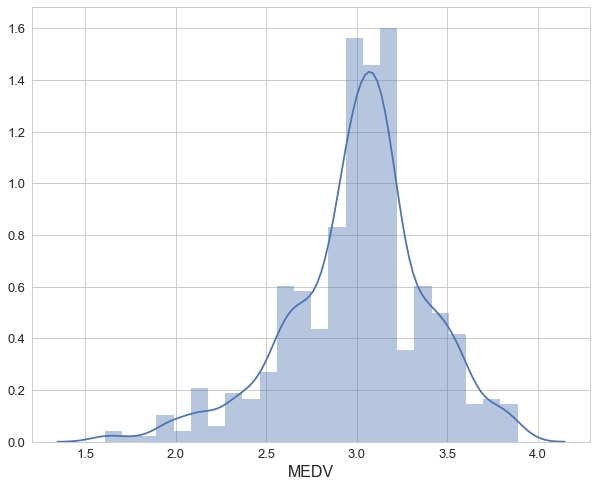

In [79]:
sns.distplot(np.log(df.MEDV));

<div class="panel panel-success" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Финиш!</h3> 
    </div>
</div>

Ееее! Ты умничка, если все сделал ^^